In [117]:
import  pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline         

In [118]:
# read data
train = pd.read_csv("./datasets/Train-air-quality.csv")
test = pd.read_csv("./datasets/Test-air-quality.csv")
# 5 features, all normalized, 1600 entries

In [119]:
# preparing training and test data
X_train = train.values[:,:-1]
X_train = np.hstack(((np.ones((X_train.shape[0],1)),X_train)))
y_train = train.values[:,-1]
X_test = test.values[:,:-1]
X_test = np.hstack(((np.ones((X_test.shape[0],1)),X_test)))
y_test = test.values[:,-1]

### Gradient Descent For loop implementation

In [120]:
# for loop implemetation
def hypothesis(X_t,theta):
    return X_t@theta

def error(X_t, y_t, theta):
    err = (0.5*np.sum(((hypothesis(X_t, theta)-y_t)**2),axis=0))/X_t.shape[0]
    return err

def gradient(X_t, y_t, theta):
    grad = (np.transpose(X_t)@(hypothesis(X_t,theta)-y_t))/X_t.shape[0]
    return grad

def gradient_descent(X_t, y_t, alpha, max_itr, threshold):
    grad = np.zeros((X_t.shape[1],1))
    theta = np.zeros((X_t.shape[1],1))
    err = []
    y_t = y_t.reshape((-1,1))
    for x in range(max_itr):
        grad = gradient(X_t, y_t, theta)      
        theta = theta - alpha * grad
        err.append(error(X_t, y_t, theta))
        if len(err) > 1 and (abs(err[x]-err[x-1])) < threshold:
            break   
    return (theta,err)

def r_square(y,ss):
    st = np.sum((y-np.mean(y))**2,axis=0)
    return 1 - (ss/st)

### Normal Gradient Descent

[[ 3.02010513]
 [25.41629543]
 [81.19017452]
 [ 5.68965292]
 [38.65511036]
 [ 1.83366009]]


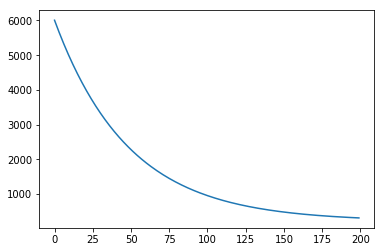

In [121]:
# Training model
(theta,err) = gradient_descent(X_train,y_train, alpha =0.01,max_itr=200, threshold=0.001)
print(theta)

## plot training error graph
plt.plot(err)

In [122]:
# predicting y tr value
y_pred_train = X_train@theta


# #r2 score
print("r2 score: %4f"%r2_score(y_train,y_pred_train))

r2 score: 0.949929


In [123]:
# predicting y test value
y_pred_test = X_test@theta

# # r2 score
print("r2 score: %4f"%r2_score(y_test,y_pred_test))

r2 score: 0.952123


### Stochastic Gradient Descent

In [124]:
def gradient_batch_descent(X_t, y_t, alpha, max_itr, threshold=0.0001, batch_size=5):
    grad = np.zeros((X_train.shape[1],1))
    theta = np.zeros((X_train.shape[1],1))
    err = []
    t_err = []
    m = X_train.shape[0]
    y_t = y_t.reshape((-1,1))
    for x in range(max_itr):
        for i in range(int(m/batch_size)):
            err = []
            grad = gradient(X_t[i*batch_size:(i+1)*batch_size,:], y_t[i*batch_size:(i+1)*batch_size], theta)
            theta = theta - alpha * grad
            err.append(error(X_t[i*batch_size:(i+1)*batch_size,:], y_t[i*batch_size:(i+1)*batch_size], theta))
        t_err.append(np.mean(err))
        if len(t_err) > 1 and (abs(np.mean(t_err[:])-np.mean(t_err[:-1]))) < threshold:
            break
    return (theta,t_err)

(6, 1)


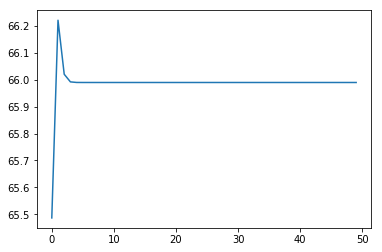

In [125]:
# Training model
(theta_g,err_g) = gradient_batch_descent(X_train,y_train, alpha =0.01,max_itr=200)
print(theta_g.shape)

## plot training error graph
plt.plot(err_g)

In [126]:
# predicting y test value
y_pred_train_g = X_train@theta_g

# # r2 score
print("r2 score: %4f"%r2_score(y_train,y_pred_train_g))

r2 score: 0.965983


In [127]:
# predicting y test value
y_pred_test_g = X_test@theta_g

# # r2 score
print("r2 score: %4f"%r2_score(y_test,y_pred_test_g))

r2 score: 0.968912
